In [1]:
import pyAMARES
import numpy as np
pyAMARES.__version__

'0.3.15'

# Fitting Simulated In Vivo 31P MRS Data
**[Try This Tutorial on Google Colab!](https://colab.research.google.com/drive/1H8GdP4XX292JovAF5TNOEBaYQT5vk_DT)**

## Simulating an In Vivo MRS Spectrum

- **Load Prior Knowledge**: Use the dataset based on the 7T brain data reported by Ren et al. in NMR Biomedicine, 28(11): 1455–1462.

Warning, fid is None!
Checking comment lines in the prior knowledge file
Comment: in line 0 "#  Ren et al, NMR Biomed . 2015 Nov;28(11):1455-62. doi: 10.1002/nbm.3384.",,,,,,,,,,,,,,,,

Comment: in line 14 # Phase not fixed ,,,,,,,,,,,,,,,,

Comment: in line 15 " # 2024/06/24 In Ren et al, the chemical shift range of BATP (0.1 ppm), AATP (0.04 ppm), and GATP (0.02 ppm) are smaller than the J-couplin range (0.125 - 0.25 ppm). ",,,,,,,,,,,,,,,,

Comment: in line 16 "# So, increase the chemical shift range",,,,,,,,,,,,,,,,



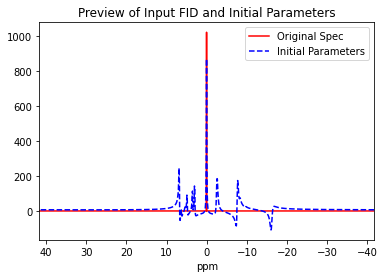

Printing the Prior Knowledge File ./attachment/example_human_brain_31P_7T_flex_phase.csv


,BATP,BATP2,BATP3,AATP,AATP2,GATP,GATP2,UDPG,NAD,PCr,GPC,GPE,Pin,Pex,PC,PE
Index,,,,,,,,,,,,,,,,
Initial Values,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude,1.41,BATP/2,BATP/2,1.545,AATP,1.5,GATP,0.08,0.41,4.37,1.32,0.8,0.85,0.3,0.3,2.27
chemicalshift,-16.15,BATP-15Hz,BATP+15Hz,-7.56,AATP-16Hz,-2.52,GATP-16Hz,-9.72,-8.25,0,2.95,3.5,4.82,5.24,6.24,6.76
linewidth,58.12,BATP,BATP,32.28,AATP,39.02,GATP,32.37,40.49,15.41,19.96,19.1,21.04,30.91,19.96,22.63
phase,0,BATP,BATP,0,AATP,0,GATP,0,0,0,0,0,0,0,0,0
g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bounds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude,"(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,","(0,"
chemicalshift,"(-16.30,-16.00)","(-16.30,-16.00)","(-16.30,-16.00)","(-7.72,-7.42)","(-7.72,-7.42)","(-2.65,-2.39)","(-2.65,-2.39)","(-9.76,-9.68)","(-8.25,-8.17)","(-0.5, 0.5)","(2.94,2.96)","(3.49,3.51)","(4.81,4.83)","(5.19,5.29)","(6.22,6.26)","(6.71,6.81)"


In [2]:
priorknowledge =  pyAMARES.initialize_FID(fid=None,
                                priorknowledgefile='./attachment/example_human_brain_31P_7T_flex_phase.csv',
                                preview=True) 

- **Perturb Peak Parameters**: Randomly adjust the 31P spectra peak parameters by 5%, chemical shift by 10 Hz

In [3]:
from copy import deepcopy

In [4]:
params0 = deepcopy(priorknowledge.initialParams) # Make a copy of initialParams to be perturbed

In [5]:
def perturb_value(value, percentage=5):
    percentage = float(percentage)
    # Generate a random perturbation factor between 0.95 and 1.05
    factor = np.random.uniform(1-percentage/100, 1+percentage/100)
    # Apply the perturbation factor
    result = value * factor
    # print(f"Perturbing input {value=} to {result=}")
    return result

def perturb_table(inputparams, percentage=5, freq_shift=5, phase_shift=0):
    params = deepcopy(inputparams)
    for i in params:
        if params[i].name.startswith('ak') or params[i].name.startswith('dk') :
            params[i].value = perturb_value(params[i].value)
        if params[i].name.startswith('freq'):
            params[i].value += np.random.uniform(-freq_shift, freq_shift)
        if params[i].name.startswith('phi'):
            params[i].value += np.random.uniform(-np.deg2rad(phase_shift), np.deg2rad(phase_shift))
    return params

In [6]:
params = perturb_table(params0, percentage=5, freq_shift=5, phase_shift=0)

- **Simulate the 31P MRS Spectra Using Scanner Parameters**:
    - **MHz (Field Strength)**: 120 MHz, corresponding to 31P at 7T.
    - **sw (Spectral Width)**: 10000.0 Hz.
    - **Deadtime**: 200 microseconds (200e-6 seconds).
    - **Number of Points (fid_len)**: 1024.
    - **SNR (Signal to Noise Ratio, snr_target)**: 20.

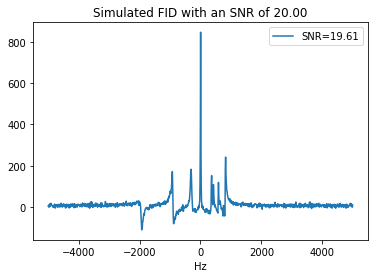

In [7]:
fid = pyAMARES.kernel.fid.simulate_fid(params, 
                                       MHz=120.0, 
                                       sw=10000.0, 
                                       deadtime=200e-6, 
                                       fid_len=1024, 
                                       snr_target=20 , 
                                       preview=True)

## Simple Tutorial on pyAMARES Fitting
- **Initialize the FID Object**: 

In [8]:
FIDobj =  pyAMARES.initialize_FID(fid=fid,
                                  MHz=120.0, 
                                  sw=10000.0, 
                                  deadtime=200e-6,
                                  normalize_fid=False,
                                  priorknowledgefile='./attachment/example_human_brain_31P_7T_flex_phase.csv',
                                  preview=False) 

Checking comment lines in the prior knowledge file
Comment: in line 0 "#  Ren et al, NMR Biomed . 2015 Nov;28(11):1455-62. doi: 10.1002/nbm.3384.",,,,,,,,,,,,,,,,

Comment: in line 14 # Phase not fixed ,,,,,,,,,,,,,,,,

Comment: in line 15 " # 2024/06/24 In Ren et al, the chemical shift range of BATP (0.1 ppm), AATP (0.04 ppm), and GATP (0.02 ppm) are smaller than the J-couplin range (0.125 - 0.25 ppm). ",,,,,,,,,,,,,,,,

Comment: in line 16 "# So, increase the chemical shift range",,,,,,,,,,,,,,,,



- **A. HSVD Optimization of Initial Parameters (Optional)**: Utilize HSVD to optimize the initial parameters for fitting, if desired.

Norm of residual = 60.705
Norm of the data = 2437.624
resNormSq / dataNormSq = 0.025


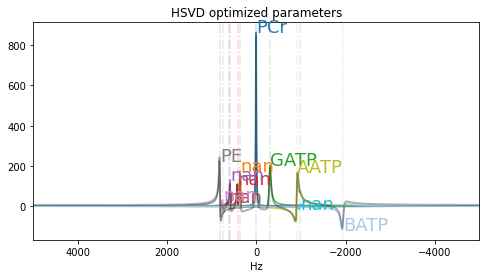

In [9]:
params_hsvd = pyAMARES.HSVDinitializer(fid_parameters=FIDobj, 
                                      num_of_component=11,  # If error happens, decreasae this number
                                      fitting_parameters=FIDobj.initialParams, preview=True)

- **Fitting AMARES Using HSVD-Initialized Parameters**:

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 3.272e-06
Fitting with method=least_squares took 4.094196 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 10
Reduced chi-squared (redchi): 0.02938945336583933
Fit success status: Success
Fit message: `ftol` termination condition is satisfied.
Norm of residual = 58.779
Norm of the data = 2437.624
resNormSq / dataNormSq = 0.024


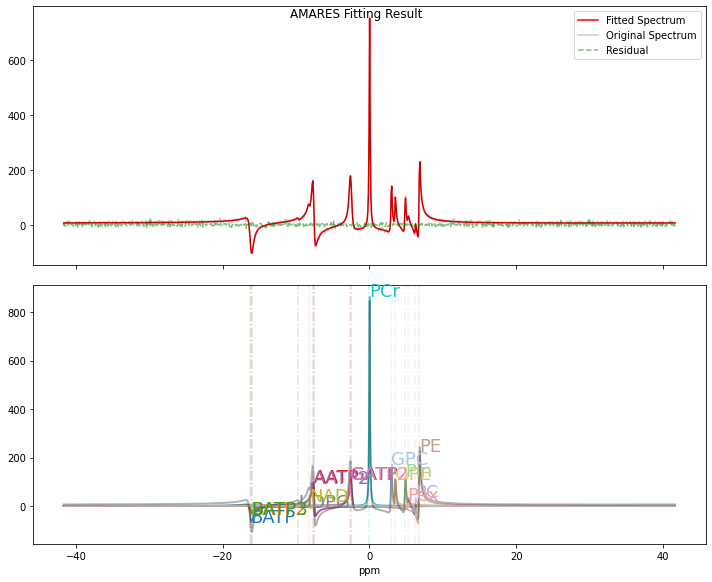

In [10]:
FIDresult1 = pyAMARES.fitAMARES(fid_parameters=FIDobj, fitting_parameters=params_hsvd, 
                       method='least_squares', ifplot=True,
                       inplace=False)

In [11]:
FIDresult1.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%),SNR
name,,,,,,,,,,,,,,,,
BATP,2.674,0.052,2.719,-16.170,0.007,0.061,55.597,1.712,4.283,-0.740,1.120,210.588,0.000,0.000,nan,11.722
AATP,2.980,0.066,3.079,-7.550,0.004,0.078,32.917,1.022,4.321,-0.301,1.268,586.431,0.000,0.000,nan,13.063
GATP,3.084,0.046,2.078,-2.504,0.004,0.225,41.157,0.972,3.287,0.894,0.856,133.239,0.000,0.000,nan,13.521
UDPG,0.115,0.043,52.553,-9.704,0.073,1.041,35.619,17.426,68.062,-8.377,21.644,359.440,0.000,0.000,nan,0.503
NAD,0.357,0.065,25.210,-8.250,0.029,0.490,35.770,6.979,27.143,7.361,10.382,196.231,0.000,0.000,nan,1.566
PCr,4.317,0.025,0.816,-0.002,0.001,39.165,15.675,0.127,1.127,0.026,0.336,1799.395,0.000,0.000,nan,18.925
GPC,1.355,0.037,3.753,2.959,0.003,0.137,20.943,0.699,4.644,-2.207,1.546,97.414,0.000,0.000,nan,5.940
GPE,0.812,0.037,6.419,3.490,0.005,0.195,20.849,1.175,7.840,0.318,2.644,1154.799,0.000,0.000,nan,3.559
Pin,0.978,0.049,6.909,4.830,0.005,0.139,21.428,1.159,7.525,-1.061,2.846,373.210,0.000,0.000,nan,4.286


- **B. Initialization Using Levenberg-Marquardt Method**: Instead of using the HSVD initializer, initialize the parameters using the Levenberg-Marquardt method.

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 3.272e-06
Fitting with method=leastsq took 3.205622 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
a_sd is all None, use crlb instead!
freq_sd is all None, use crlb instead!
lw_sd is all None, use crlb instead!
phase_sd is all None, use crlb instead!
g_std is all None, use crlb instead!
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 592
Reduced chi-squared (redchi): 0.030032888165139694
Fit success status: Success
Fit message: Fit succeeded. Could not estimate error-bars.
Norm of residual = 60.066
Norm of the data = 2437.624
resNormSq / dataNormSq = 0.025


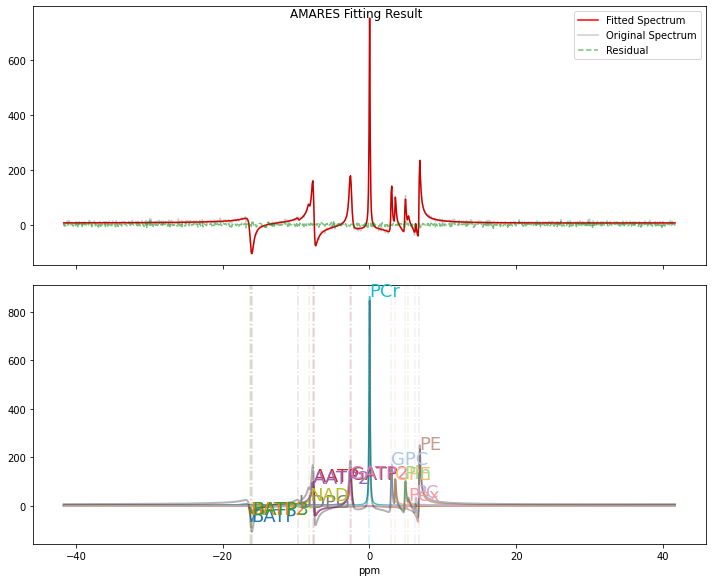

In [12]:
params_LM = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                               fitting_parameters=FIDobj.initialParams, 
                               method='leastsq', 
                               ifplot=True,
                               inplace=False)

- **Fitting AMARES Using Levenberg-Marquardt-Initialized Parameters**:

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 3.272e-06
Fitting with method=least_squares took 2.847565 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 7
Reduced chi-squared (redchi): 0.029389448688921037
Fit success status: Success
Fit message: `ftol` termination condition is satisfied.
Norm of residual = 58.779
Norm of the data = 2437.624
resNormSq / dataNormSq = 0.024


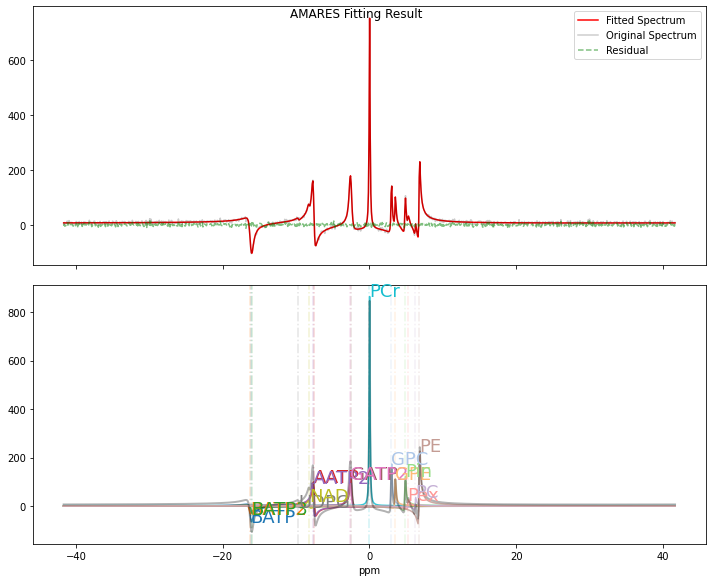

In [13]:
FIDresult2 = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                                fitting_parameters=params_LM.fittedParams, 
                                initialize_with_lm=False, 
                                method='least_squares', ifplot=True,
                                inplace=False)

In [14]:
FIDresult2.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%),SNR
name,,,,,,,,,,,,,,,,
BATP,2.674,0.052,2.719,-16.170,0.007,0.061,55.597,1.712,4.283,-0.740,1.120,210.575,0.000,0.000,nan,11.722
AATP,2.980,0.066,3.078,-7.550,0.004,0.078,32.919,1.022,4.320,-0.303,1.268,582.965,0.000,0.000,nan,13.064
GATP,3.084,0.046,2.078,-2.504,0.004,0.225,41.157,0.972,3.287,0.893,0.856,133.294,0.000,0.000,nan,13.521
UDPG,0.115,0.043,52.555,-9.704,0.073,1.041,35.619,17.427,68.067,-8.372,21.645,359.668,0.000,0.000,nan,0.503
NAD,0.357,0.065,25.205,-8.250,0.029,0.490,35.746,6.974,27.142,7.363,10.381,196.144,0.000,0.000,nan,1.565
PCr,4.317,0.025,0.816,-0.002,0.001,39.167,15.675,0.127,1.127,0.026,0.336,1804.444,0.000,0.000,nan,18.925
GPC,1.355,0.037,3.753,2.959,0.003,0.137,20.943,0.699,4.644,-2.208,1.546,97.402,0.000,0.000,nan,5.940
GPE,0.812,0.037,6.419,3.490,0.005,0.195,20.849,1.175,7.840,0.318,2.644,1156.480,0.000,0.000,nan,3.559
Pin,0.977,0.049,6.910,4.830,0.005,0.139,21.427,1.159,7.526,-1.062,2.846,372.915,0.000,0.000,nan,4.285


- **New after 0.3.10**: Fitting AMARES using internally initialized Levenberg-Marquardt parameters:

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 3.272e-06
Run internal leastsq initializer to optimize fitting parameters for the next least_squares fitting
Fitting with method=leastsq took 3.347826 seconds
Fitting with method=least_squares took 2.887092 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 7
Reduced chi-squared (redchi): 0.029389448688921037
Fit success status: Success
Fit message: `ftol` termination condition is satisfied.
Norm of residual = 58.779
Norm of the data = 2437.624
resNormSq / dataNormSq = 0.024


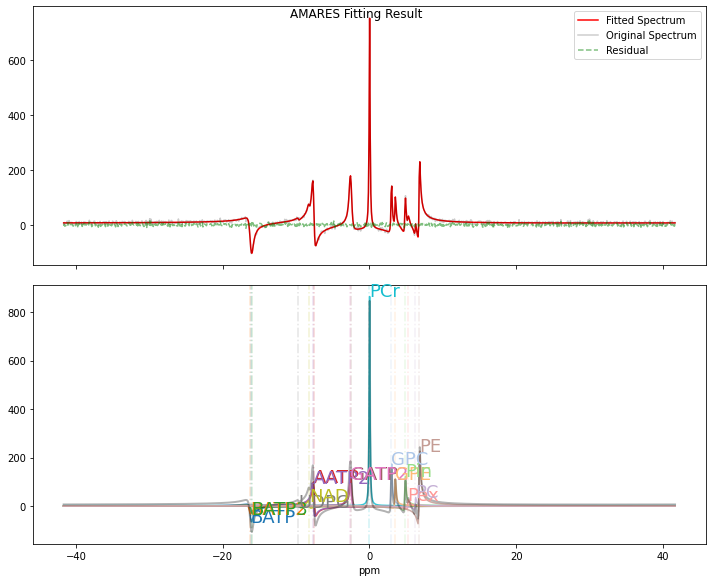

In [15]:
FIDresult2b = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                                fitting_parameters=FIDobj.initialParams, 
                                initialize_with_lm=True, # Turn on the Levenberg-Marquardt initializer
                                method='least_squares', ifplot=True,
                                inplace=False)

In [16]:
FIDresult2b.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%),SNR
name,,,,,,,,,,,,,,,,
BATP,2.674,0.052,2.719,-16.170,0.007,0.061,55.597,1.712,4.283,-0.740,1.120,210.575,0.000,0.000,nan,11.722
AATP,2.980,0.066,3.078,-7.550,0.004,0.078,32.919,1.022,4.320,-0.303,1.268,582.965,0.000,0.000,nan,13.064
GATP,3.084,0.046,2.078,-2.504,0.004,0.225,41.157,0.972,3.287,0.893,0.856,133.294,0.000,0.000,nan,13.521
UDPG,0.115,0.043,52.555,-9.704,0.073,1.041,35.619,17.427,68.067,-8.372,21.645,359.668,0.000,0.000,nan,0.503
NAD,0.357,0.065,25.205,-8.250,0.029,0.490,35.746,6.974,27.142,7.363,10.381,196.144,0.000,0.000,nan,1.565
PCr,4.317,0.025,0.816,-0.002,0.001,39.167,15.675,0.127,1.127,0.026,0.336,1804.444,0.000,0.000,nan,18.925
GPC,1.355,0.037,3.753,2.959,0.003,0.137,20.943,0.699,4.644,-2.208,1.546,97.402,0.000,0.000,nan,5.940
GPE,0.812,0.037,6.419,3.490,0.005,0.195,20.849,1.175,7.840,0.318,2.644,1156.480,0.000,0.000,nan,3.559
Pin,0.977,0.049,6.910,4.830,0.005,0.139,21.427,1.159,7.526,-1.062,2.846,372.915,0.000,0.000,nan,4.285


## Visualize Fitting Results

- **Visualization with pyAMARES**: pyAMARES utilizes the `plotParameter` object to display fitting results visually.
- **Template for `plotParameter`**: Within the initialized `FIDobj`, there is a pre-configured template for `plotParameter` to facilitate customization and usage.

In [17]:
plotParameter = FIDobj.plotParameters # plotParameter is a pointer to FIDobj.plotParameters
                                      # If you do not want to modify FIDobj.plotParameters, 
                                      # do plotParameter = deepcopy(FIDobj.plotParameters) instead
plotParameter

Namespace(deadtime=0.0002, ifphase=False, lb=2.0, sw=10000.0, xlim=None)

- **Modify the visualization parameters**

In [18]:
plotParameter.ifphase = True # Phasing the spectrum for visualization
plotParameter.xlim = (10, -20) # Show 10 to -20 ppm only

fitting_parameters is None, just use the fid_parameters.out_obj.params


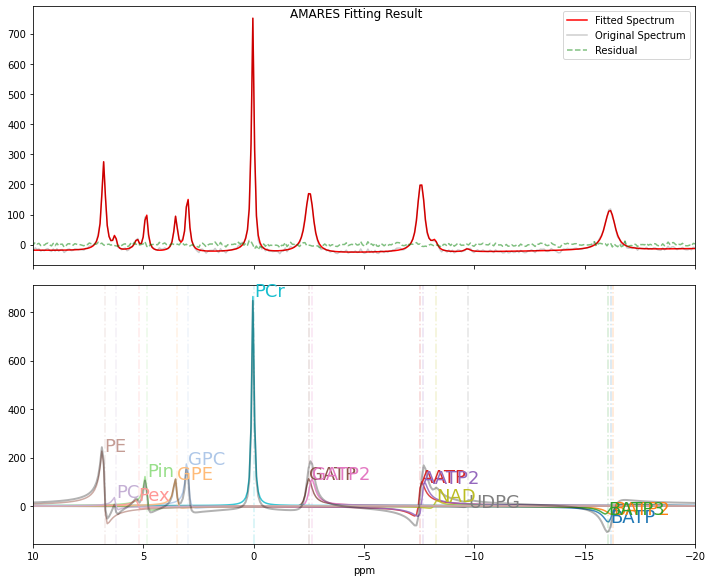

In [19]:
pyAMARES.plotAMARES(FIDresult2, plotParameters=plotParameter)

- **Uniform Phase for All Peaks**: Previously, each peak's phase was fitted independently. We can now attempt to use the same phase for all peaks.
- **Editing Parameters**: Parameters can be edited programmatically using Python. Alternatively, you can manually edit them using Excel or similar software. Use the `pyAMARES.kernel.lmfit.save_parameter_to_csv` function to save parameters to a CSV file, and `pyAMARES.kernel.lmfit.load_parameter_from_csv` to reload them as an lmfit parameter object.
``

In [20]:
initial_params_fixedphase = deepcopy(params_LM.fittedParams) # Starting from the Levenberg-Marquardt-Initialized Parameters

In [21]:
# Constrain all phase parameters (starting with `phi` ) to the phase of PCr (`phi_Pcr`)
for peak_para in initial_params_fixedphase:
    if peak_para.startswith('phi'):
        initial_params_fixedphase[peak_para].expr = 'phi_PCr'

In [22]:
# But do not fix phi_PCr itself because it will be fitted
initial_params_fixedphase['phi_PCr'].expr = None
initial_params_fixedphase['phi_PCr'].vary = True

- If you modified the `FIDobj.plotParameters` above and turned on `ifphase`, the following preview will show phased spectrum

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 3.272e-06
Fitting with method=least_squares took 2.466645 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 7
Reduced chi-squared (redchi): 0.029406123609762042
Fit success status: Success
Fit message: `ftol` termination condition is satisfied.
Norm of residual = 59.136
Norm of the data = 2437.624
resNormSq / dataNormSq = 0.024


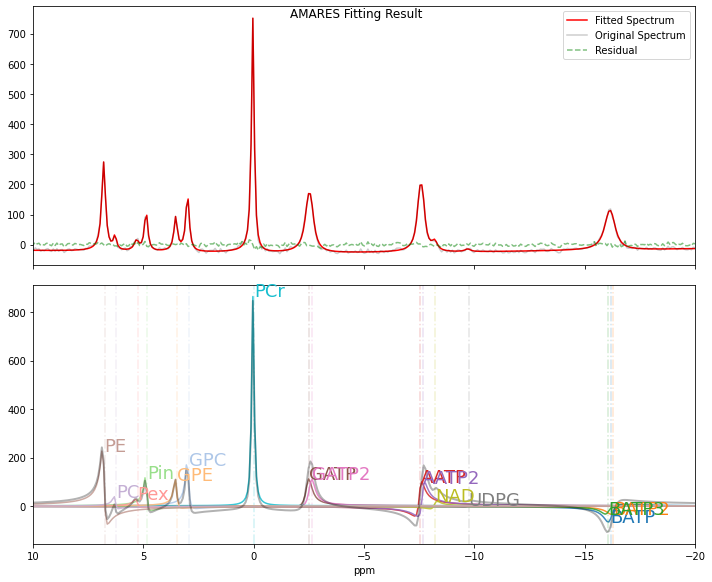

In [23]:
FIDresult3 = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                                fitting_parameters=initial_params_fixedphase, 
                       method='least_squares', ifplot=True,
                       inplace=False)

In [24]:
FIDresult3.styled_df

,amplitude,sd,CRLB(%),chem shift(ppm),sd(ppm),CRLB(cs%),LW(Hz),sd(Hz),CRLB(LW%),phase(deg),sd(deg),CRLB(phase%),g,g_sd,g (%),SNR
name,,,,,,,,,,,,,,,,
BATP,2.674,0.052,2.702,-16.173,0.005,0.042,55.589,1.702,4.277,0.003,0.284,13301.285,0.000,0.000,nan,11.724
AATP,2.997,0.049,2.297,-7.552,0.002,0.043,33.052,0.886,3.743,0.003,0.284,13301.285,0.000,0.000,nan,13.138
GATP,3.082,0.045,2.029,-2.501,0.003,0.157,41.157,0.958,3.252,0.003,0.284,13301.285,0.000,0.000,nan,13.511
UDPG,0.105,0.038,51.020,-9.732,0.051,0.737,35.619,17.911,70.253,0.003,0.284,13301.285,0.000,0.000,nan,0.460
NAD,0.344,0.047,19.213,-8.234,0.015,0.263,34.557,5.976,24.161,0.003,0.284,13301.285,0.000,0.000,nan,1.507
PCr,4.320,0.025,0.795,-0.002,0.000,36.750,15.685,0.125,1.115,0.003,0.284,13301.285,0.000,0.000,nan,18.938
GPC,1.345,0.030,3.109,2.956,0.002,0.087,20.857,0.639,4.278,0.003,0.284,13301.285,0.000,0.000,nan,5.898
GPE,0.784,0.030,5.320,3.490,0.003,0.122,20.593,1.077,7.306,0.003,0.284,13301.285,0.000,0.000,nan,3.436
Pin,0.898,0.033,5.058,4.829,0.003,0.075,20.120,0.959,6.658,0.003,0.284,13301.285,0.000,0.000,nan,3.937


- **Convert lmfit Parameter to Pandas DataFrame**:
    - For comparison and easier editing, import functions that enable conversion between an lmfit Parameter object and a Python pandas DataFrame.

In [25]:
from pyAMARES import dataframe_to_parameters, parameters_to_dataframe

In [26]:
origin = parameters_to_dataframe(params) # Original parameters
result1 = parameters_to_dataframe(FIDresult1.fittedParams) # Fitting Result using HSVD initialized parameters
result2 = parameters_to_dataframe(FIDresult2.fittedParams) # Fitting Result using Levenberg-Marquardt initialized parameters
result3 = parameters_to_dataframe(FIDresult3.fittedParams) # Fitting Result using fixed phase of all peaks

In [27]:
# Generate index for peak amplitudes only.
amplitude_index = origin.name.str.startswith('ak')
amplitude_index

0      True
1     False
2     False
3     False
4     False
      ...  
75     True
76    False
77    False
78    False
79    False
Name: name, Length: 80, dtype: bool

In [28]:
# Define a function to do linear regression between two lists
import matplotlib.pyplot as plt
import scipy
def compare_plot(x, y, labellist, title='', 
                 xlabel='', 
                 ylabel=''):
    assert len(x) == len(y) == len(labellist)
    x = x / x[0]
    y = y / y[0]
    plt.scatter(x, y)
    for i, j, l in zip(x, y, labellist):
        plt.annotate(l, (i*1.02,j*1.02))

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = slope * x_fit + intercept
    plt.plot(x_fit, y_fit, 'r', label=f'{slope=:.3f}')  # Linear fit line

    combined_min = min(min(x), min(y)) * 0.95
    combined_max = max(max(x), max(y)) * 1.05
    plt.plot([combined_min, combined_max], [combined_min, combined_max], 'k--')  # Dashed diagonal line

    # Beautify the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.axis('equal')  # Use the same scale for both x and y axes

    # Print the results
    print(f"Slope: {slope:.3f}")
    print(f"Pearson's R: {r_value:.4f}")
    print(f"P-value: {p_value:.2e}")
    plt.title(f"{title} {r_value=:.2f} {p_value=:.2f}")
    plt.xlim(combined_min, combined_max)
    plt.ylim(combined_min, combined_max)
    plt.legend()
    # Display the plot
    plt.show()

    # Return the slope, Pearson's R, and p-value
    return slope, r_value, p_value


- Now we have three fitting results:
    - `result1`: Fitting result using HSVD-initialized parameters.
    - `result2`: Fitting result using Levenberg-Marquardt-initialized parameters.
    - `result3`: Fitting result with a fixed phase for all peaks.
- Compare them to the ground truth by linear regressions
    - Compare these fitting results to the ground truth using linear regression analyses.


Slope: 1.010
Pearson's R: 0.9994
P-value: 7.76e-22


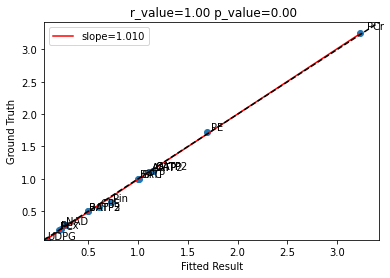

(1.0100482517034377, 0.9993970400271834, 7.756561077231895e-22)

In [29]:
compare_plot(y=origin[amplitude_index]['value'], x=result1[amplitude_index]['value'], labellist=FIDresult1.peaklist, 
             xlabel='Fitted Result', ylabel='Ground Truth')

Slope: 1.010
Pearson's R: 0.9994
P-value: 7.77e-22


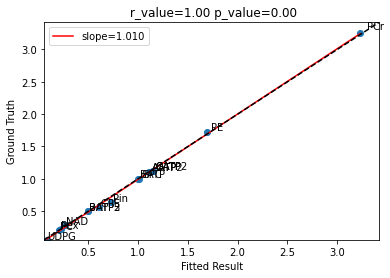

(1.0100336333131852, 0.9993969461106356, 7.765020204157357e-22)

In [30]:
compare_plot(x=result2[amplitude_index]['value'], 
             y=origin[amplitude_index]['value'],
             labellist=FIDresult1.peaklist, 
             xlabel='Fitted Result', ylabel='Ground Truth')

Slope: 1.004
Pearson's R: 0.9998
P-value: 1.37e-24


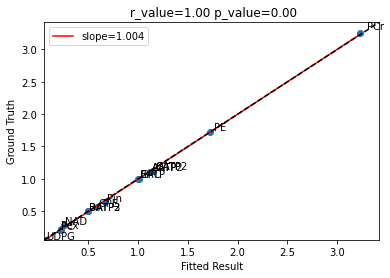

(1.0040222816356523, 0.9997562479405305, 1.3699271385183424e-24)

In [31]:
compare_plot(x=result3[amplitude_index]['value'], 
             y=origin[amplitude_index]['value'],
             labellist=FIDresult1.peaklist, 
             xlabel='Fitted Result', ylabel='Ground Truth')